<a href="https://colab.research.google.com/github/vkvinay0627/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Cardiovascular Risk Prediction </u></b>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

Data Description
Demographic:

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
Behavioral

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

Predict variable (desired target)
• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV



*   **Importing data**



In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [34]:
df1=pd.read_csv("/content/drive/MyDrive/Almabetter/data_cardiovascular_risk.csv", encoding= 'unicode_escape')
df1.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0




*   **Exploratory Data Analysis**



In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [36]:
df1.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [37]:
# Missing Value Count Function
def show_missing():
    missing = df1.columns[df1.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(df1[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df1[show_missing()].isnull().sum().sort_values(ascending = False)/len(df1)*100,2))

Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


In [38]:
df1=df1.drop(['id','education'],axis=1)
df1['heartRate'].fillna(df1['heartRate'].mean(),inplace=True)
df1['BMI'].fillna(df1['BMI'].mean(),inplace=True)
df1.dropna(axis=0,inplace=True)
df1.info()
df1.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3016 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3016 non-null   int64  
 1   sex              3016 non-null   object 
 2   is_smoking       3016 non-null   object 
 3   cigsPerDay       3016 non-null   float64
 4   BPMeds           3016 non-null   float64
 5   prevalentStroke  3016 non-null   int64  
 6   prevalentHyp     3016 non-null   int64  
 7   diabetes         3016 non-null   int64  
 8   totChol          3016 non-null   float64
 9   sysBP            3016 non-null   float64
 10  diaBP            3016 non-null   float64
 11  BMI              3016 non-null   float64
 12  heartRate        3016 non-null   float64
 13  glucose          3016 non-null   float64
 14  TenYearCHD       3016 non-null   int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 377.0+ KB


(3016, 15)

In [39]:
df1.isna().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [40]:
df = df1.copy()

In [41]:
Categorical_columns = df.iloc[:,:]
discrete = []
for var in Categorical_columns:
    if len(df[var].unique())<20:
        print(var, ' values: ', df[var].unique())
        discrete.append(var)
        
print('There are {} Categorical columns'.format(len(discrete)))

sex  values:  ['F' 'M']
is_smoking  values:  ['YES' 'NO']
BPMeds  values:  [0. 1.]
prevalentStroke  values:  [0 1]
prevalentHyp  values:  [0 1]
diabetes  values:  [0 1]
TenYearCHD  values:  [1 0]
There are 7 Categorical columns


In [42]:
categorical_features = df.loc[:,['sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']]
categorical_features.head()

,sex,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,F,YES,0.0,0,0,0,1
1,M,NO,0.0,0,1,0,0
2,F,YES,0.0,0,0,0,0
3,M,YES,0.0,0,1,0,1
4,F,YES,0.0,0,0,0,0


In [43]:
# for col in categorical_features:
#     counts = df[col].value_counts().sort_index()
#     fig = plt.figure(figsize=(6, 5))
#     ax = fig.gca()
#     counts.plot.bar(ax = ax, color='steelblue')
#     ax.set_title(col + ' counts')
#     ax.set_xlabel(col) 
#     ax.set_ylabel("Frequency")
# plt.show()

In [44]:
Numerical_columns = df.iloc[:,:]
discrete = []
for var in Numerical_columns:
    if len(df[var].unique())>10:
        print(var)
        discrete.append(var)
        
print('There are {} Numerical columns'.format(len(discrete)))

age
cigsPerDay
totChol
sysBP
diaBP
BMI
heartRate
glucose
There are 8 Numerical columns


In [45]:
numerical_features = df.loc[:,['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']]
numerical_features.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,64,3.0,221.0,148.0,85.0,25.794964,90.0,80.0
1,36,0.0,212.0,168.0,98.0,29.770000,72.0,75.0
2,46,10.0,250.0,116.0,71.0,20.350000,88.0,94.0
3,50,20.0,233.0,158.0,88.0,28.260000,68.0,94.0
4,64,30.0,241.0,136.5,85.0,26.420000,70.0,77.0


In [46]:
# # plot a bar plot for each numerical feature count

# for col in numerical_features[:]:
#     fig = plt.figure(figsize=(9, 6))
#     ax = fig.gca()
#     feature = df[col]
#     feature.hist(bins=50, ax = ax)
#     ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
#     ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
#     ax.set_title(col)
# plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


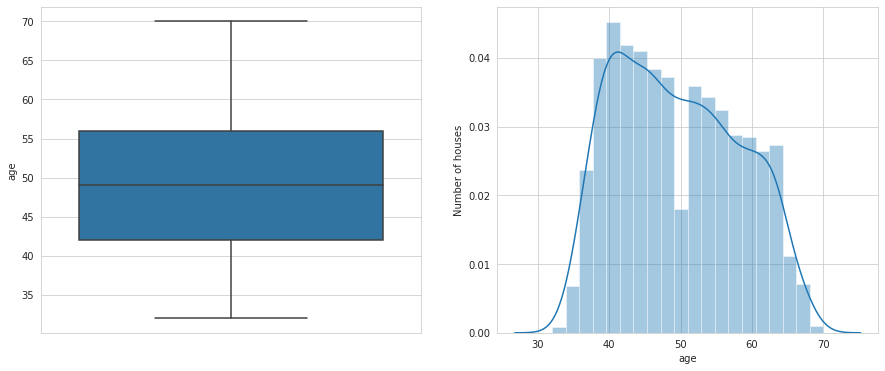

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


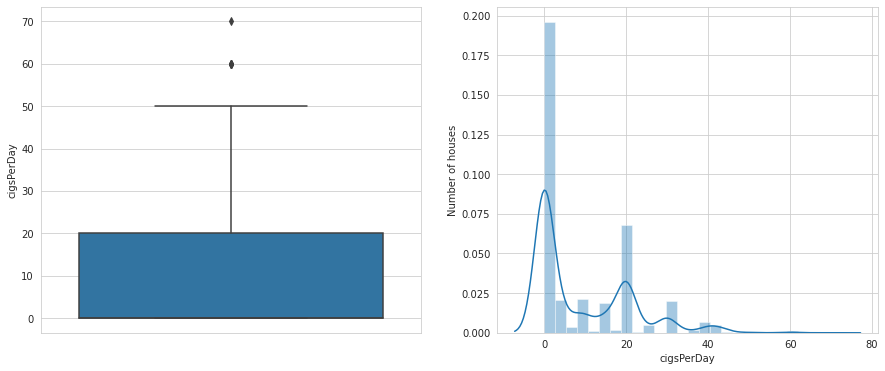

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


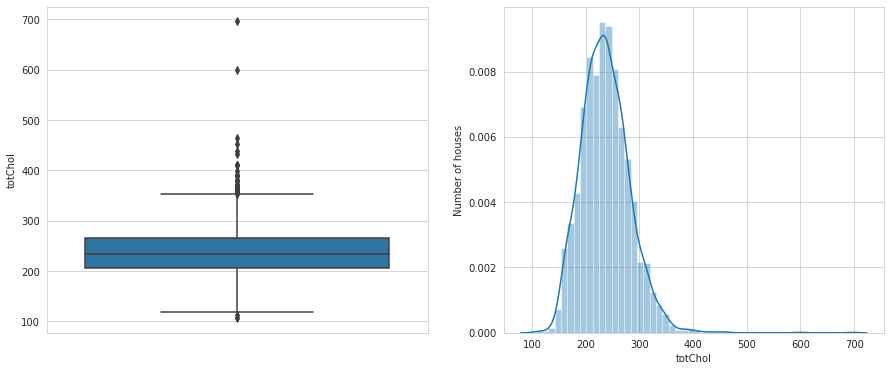

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


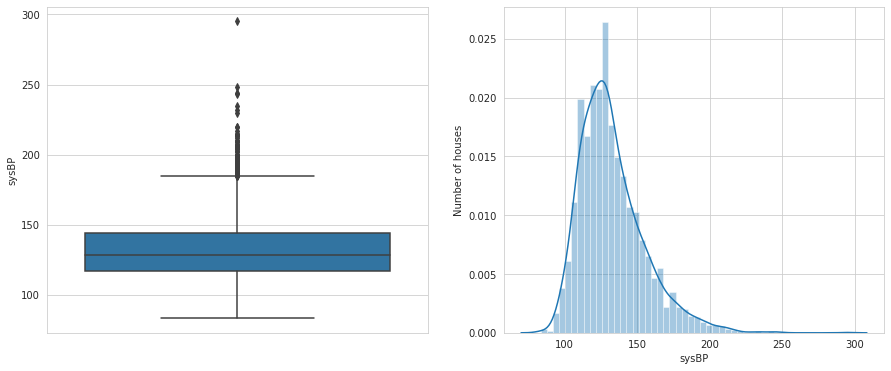

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


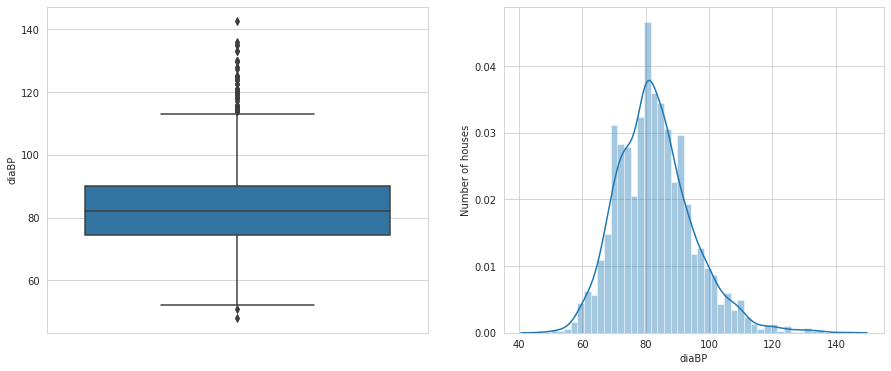

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


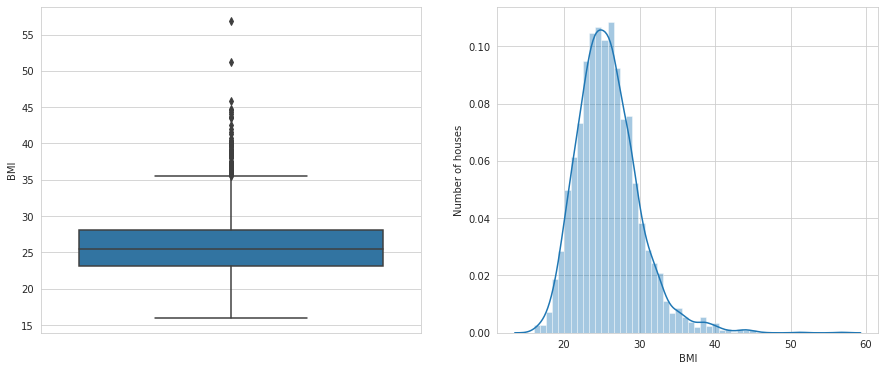

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


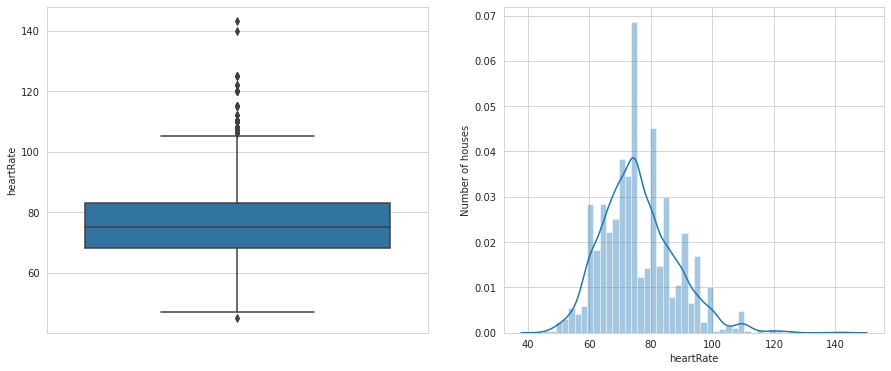

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


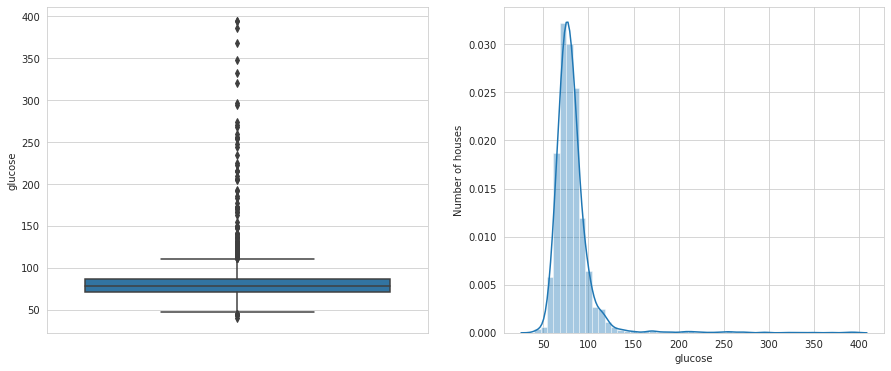

In [47]:
for var in numerical_features:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var].dropna())
    fig.set_ylabel('Number of houses')
    fig.set_xlabel(var)

    plt.show()

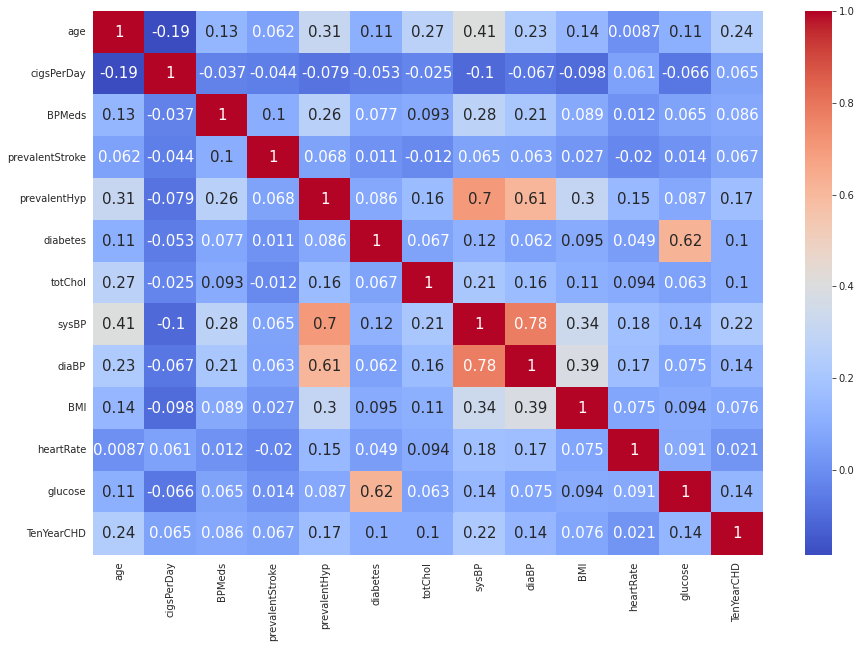

In [48]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15},cmap='coolwarm')

In [49]:
df = df.drop(['diaBP'] , 1)
df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,25.794964,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,29.770000,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,20.350000,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,28.260000,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,26.420000,70.0,77.0,0


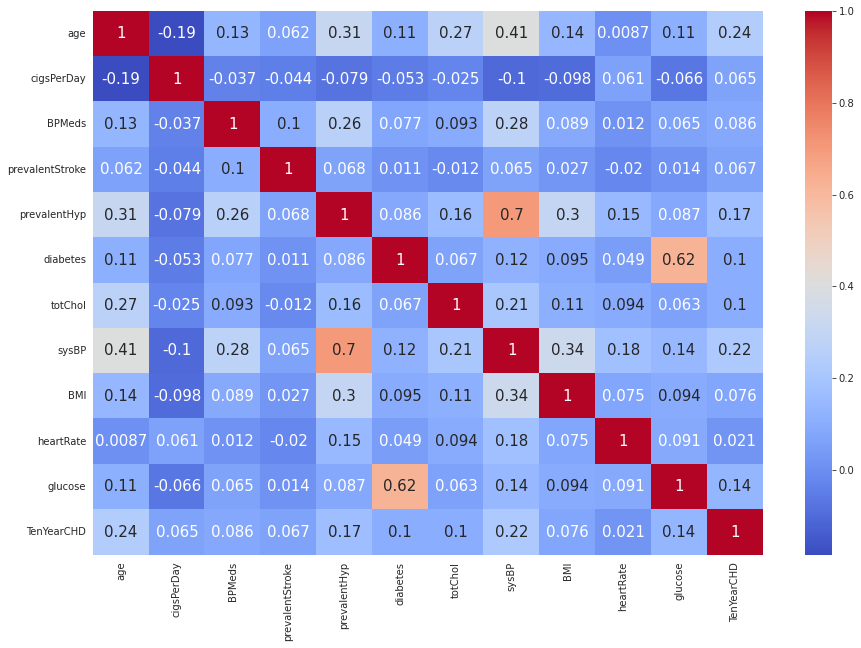

In [50]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15},cmap='coolwarm')

In [51]:
df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,25.794964,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,29.770000,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,20.350000,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,28.260000,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,26.420000,70.0,77.0,0


In [52]:
df = pd.get_dummies(df , columns = ['sex', 'is_smoking'] , prefix = ["sex" , "smoke"] , drop_first=True)
df.head()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD,sex_M,smoke_YES
0,64,3.0,0.0,0,0,0,221.0,148.0,25.794964,90.0,80.0,1,0,1
1,36,0.0,0.0,0,1,0,212.0,168.0,29.770000,72.0,75.0,0,1,0
2,46,10.0,0.0,0,0,0,250.0,116.0,20.350000,88.0,94.0,0,0,1
3,50,20.0,0.0,0,1,0,233.0,158.0,28.260000,68.0,94.0,1,1,1
4,64,30.0,0.0,0,0,0,241.0,136.5,26.420000,70.0,77.0,0,0,1


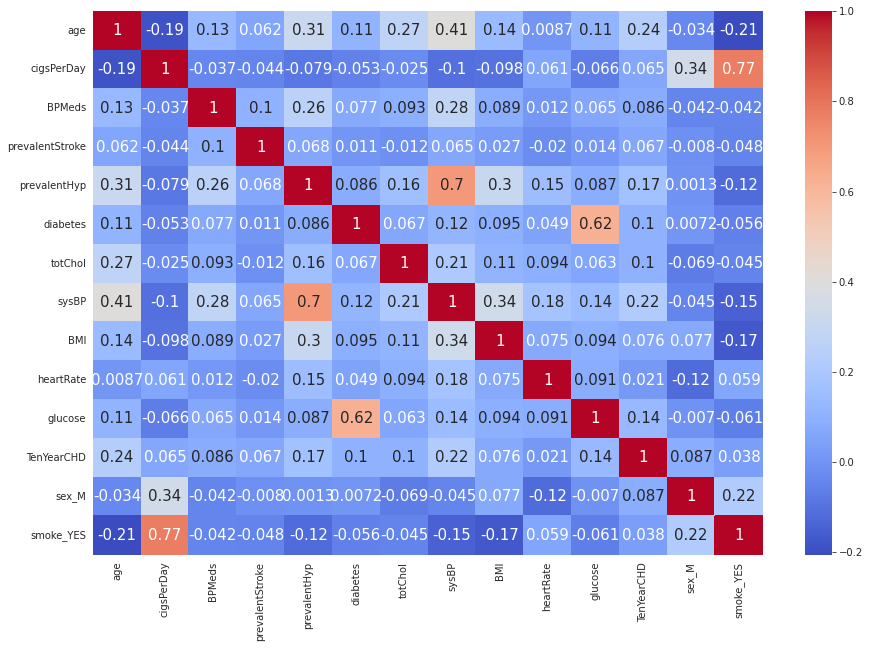

In [53]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15},cmap='coolwarm')

In [54]:
df = df.drop(['smoke_YES'] , 1)

df.head()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD,sex_M
0,64,3.0,0.0,0,0,0,221.0,148.0,25.794964,90.0,80.0,1,0
1,36,0.0,0.0,0,1,0,212.0,168.0,29.770000,72.0,75.0,0,1
2,46,10.0,0.0,0,0,0,250.0,116.0,20.350000,88.0,94.0,0,0
3,50,20.0,0.0,0,1,0,233.0,158.0,28.260000,68.0,94.0,1,1
4,64,30.0,0.0,0,0,0,241.0,136.5,26.420000,70.0,77.0,0,0


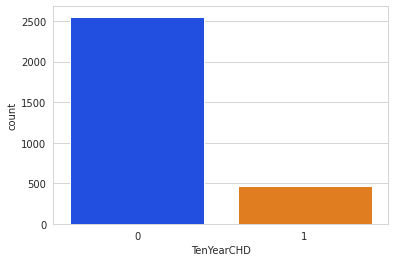

In [55]:
sns.set_style('whitegrid')
sns.countplot(x='TenYearCHD' , data = df , palette='bright')

In [56]:
X = df.drop(['TenYearCHD'], axis = 1)
y = df['TenYearCHD']

In [57]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.25, random_state = 10) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(2262, 12)
(754, 12)
(2262,)


In [58]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


In [62]:
from sklearn.linear_model import LogisticRegression
print("Model : LogisticRegression(Test) ")
log_reg = LogisticRegression(max_iter=10000).fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
Accuracy=accuracy_score(y_test,y_pred)
print("Accuracy :" , Accuracy)

from sklearn.linear_model import LogisticRegression
print("Model : LogisticRegression(Train) ")
log_reg = LogisticRegression(max_iter=10000).fit(X_train, y_train)
y_pred = log_reg.predict(X_train)
Accuracy=accuracy_score(y_train,y_pred)
print("Accuracy :" , Accuracy)
print("-"*100)
# ----------------------------------------------------------------------------------------------------------------------------------------------------
from sklearn.tree import DecisionTreeClassifier
print("Model : DecisionTreeClassifier(Test) ")
dtc = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = dtc.predict(X_test)
Accuracy=accuracy_score(y_test,y_pred)
print("Accuracy :" , Accuracy)

from sklearn.tree import DecisionTreeClassifier
print("Model : DecisionTreeClassifier(Train) ")
dtc = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = dtc.predict(X_train)
Accuracy=accuracy_score(y_train,y_pred)
print("Accuracy :" , Accuracy)
print("-"*100)
# ----------------------------------------------------------------------------------------------------------------------------------------------------
from sklearn.ensemble import RandomForestClassifier
print("Model : RandomForestClassifier(Test) ")
rfc=RandomForestClassifier(n_estimators=1000).fit(X_train, y_train)
y_pred = rfc.predict(X_test)
Accuracy=accuracy_score(y_test,y_pred)
print("Accuracy :" , Accuracy)

from sklearn.ensemble import RandomForestClassifier
print("Model : RandomForestClassifier(Train) ")
rfc=RandomForestClassifier(n_estimators=1000).fit(X_train, y_train)
y_pred = rfc.predict(X_train)
Accuracy=accuracy_score(y_train,y_pred)
print("Accuracy :" , Accuracy)
print("-"*100)
# ----------------------------------------------------------------------------------------------------------------------------------------------------
from xgboost import XGBClassifier
print("Model : XGBClassifier(Train)")
xgb=XGBClassifier().fit(X_train, y_train)
y_pred = xgb.predict(X_test)
Accuracy=accuracy_score(y_test,y_pred)
print("Accuracy :" , Accuracy)

from xgboost import XGBClassifier
print("Model : XGBClassifier(Train)")
xgb=XGBClassifier().fit(X_train, y_train)
y_pred = xgb.predict(X_train)
Accuracy=accuracy_score(y_train,y_pred)
print("Accuracy :" , Accuracy)
print("-"*100)
# ----------------------------------------------------------------------------------------------------------------------------------------------------
from sklearn.neighbors import KNeighborsClassifier
print("Model : KNeighborsClassifier(Test)")
knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)
y_pred = knn.predict(X_test)
Accuracy=accuracy_score(y_test,y_pred)
print("Accuracy :" , Accuracy)

from sklearn.neighbors import KNeighborsClassifier
print("Model : KNeighborsClassifier(Train)")
knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)
y_pred = knn.predict(X_train)
Accuracy=accuracy_score(y_train,y_pred)
print("Accuracy :" , Accuracy)
print("-"*100)
# ----------------------------------------------------------------------------------------------------------------------------------------------------
from sklearn.naive_bayes import GaussianNB
print("Model : GaussianNB(Test)")
gnb = GaussianNB().fit(X_train, y_train)
y_pred = gnb.predict(X_test)
Accuracy=accuracy_score(y_test,y_pred)
print("Accuracy :" , Accuracy)

from sklearn.naive_bayes import GaussianNB
print("Model : GaussianNB(Train)")
gnb = GaussianNB().fit(X_train, y_train)
y_pred = gnb.predict(X_train)
Accuracy=accuracy_score(y_train,y_pred)
print("Accuracy :" , Accuracy)

Model : LogisticRegression(Test) 
Accuracy : 0.850132625994695
Model : LogisticRegression(Train) 
Accuracy : 0.8567639257294429
----------------------------------------------------------------------------------------------------
Model : DecisionTreeClassifier(Test) 
Accuracy : 0.746684350132626
Model : DecisionTreeClassifier(Train) 
Accuracy : 1.0
----------------------------------------------------------------------------------------------------
Model : RandomForestClassifier(Test) 
Accuracy : 0.8381962864721485
Model : RandomForestClassifier(Train) 
Accuracy : 1.0
----------------------------------------------------------------------------------------------------
Model : XGBClassifier(Train)
Accuracy : 0.8421750663129973
Model : XGBClassifier(Train)
Accuracy : 0.8717948717948718
----------------------------------------------------------------------------------------------------
Model : KNeighborsClassifier(Test)
Accuracy : 0.8381962864721485
Model : KNeighborsClassifier(Train)
Accura